In [22]:
from softmax_neural_network import *
import matplotlib.pyplot as plt
import tensorflow as tf

This notebook tests different modifications to a softmax output neural network 

In [23]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = tf.keras.datasets.mnist.load_data()

4


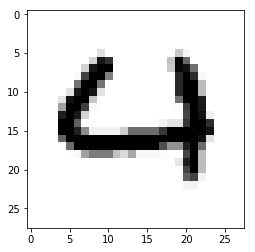

In [24]:
%matplotlib inline
image_index = 60# You may select anything up to 60,000
print(y_train_orig[image_index]) 
plt.imshow(x_train_orig[image_index], cmap='Greys')

In [58]:
#Basic setup
def one_hotorize(x, num_labels):
    #x must be of shape (1,m)
    m = x.shape[1]
    columns = np.arange(m)
    one_indexes = x
    one_hot = np.zeros((num_labels, m))
    one_hot[one_indexes, columns] = 1
    return one_hot
    
num_labels = 10
print("Number of labels = " + str(num_labels))

#Reshaping the y arrays, to be an example each column and one hot vetors
y_train_one = y_train_orig.reshape(y_train_orig.shape[0],1).T
y_test_one = y_test_orig.reshape(y_test_orig.shape[0],1).T

y_train = one_hotorize(y_train_one, num_labels)
y_test = one_hotorize(y_test_one, num_labels)

y_train = y_train.astype('float')
y_test = y_test.astype('float')

print("y_train shape = " + str(y_train.shape))
print("y_test shape = " + str(y_test.shape))

print("one_hot = " + str(y_train[:,0]) + " original label = " + str(y_train_orig[0]))
print("one_hot = " + str(y_train[:,555]) + " original label = " + str(y_train_orig[555]))

#Reshaping the x tensors to a matrix of the examples as each column
x_train = x_train_orig.reshape(x_train_orig.shape[0],x_train_orig.shape[1] * x_train_orig.shape[2]) .T
x_test = x_test_orig.reshape(x_test_orig.shape[0],x_test_orig.shape[1] * x_test_orig.shape[2]) .T

x_train = x_train.astype('float')
x_test = x_test.astype('float')

#Normalizing
x_train /= 255
x_test /= 255

print("x_train shape = " + str(x_train.shape))
print("x_test shape = " + str(x_test.shape))


Number of labels = 10
y_train shape = (10, 60000)
y_test shape = (10, 10000)
one_hot = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] original label = 5
one_hot = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] original label = 2
x_train shape = (784, 60000)
x_test shape = (784, 10000)


### One layer network

In [59]:
#Single Layer
n_x = x_train.shape[0]
layers = [n_x, num_labels]
num_hidden_layers = len(layers) - 1

In [63]:
parameters, costs = model_SNN(x_train, y_train, layers, learning_rate = 0.5, num_iterations = 1000, print_cost = True, print_every = 100, initialization = "rand", loaded_parameters = {})


Cost in iteration 0 is = 2.6430679141407745
Cost in iteration 100 is = 0.40661177177044544
Cost in iteration 200 is = 0.35606624986795554
Cost in iteration 300 is = 0.33334112442944974
Cost in iteration 400 is = 0.3195851443835973
Cost in iteration 500 is = 0.3100847536144308
Cost in iteration 600 is = 0.30300709552694244
Cost in iteration 700 is = 0.29746587982847916
Cost in iteration 800 is = 0.29297189161551784
Cost in iteration 900 is = 0.2892297516199464


In [64]:
def compute_accuracy(predictions, Y):
    m = Y.shape[1]
    mistakes = np.sum(np.abs(predictions - Y)) / 2
    return (m - mistakes) / m

In [65]:
predictions = predict_SNN(x_test, parameters, num_hidden_layers)

In [67]:
accuracy = compute_accuracy(predictions, y_test)
print(accuracy)

0.9211


In [76]:
example = x_train[:, 60].reshape(784, 1) # It is the digit 4
prediction_ex = predict_SNN(example, parameters, num_hidden_layers)
prediction_ex

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Two Layer network

In [ ]:
n_x = x_train.shape[0]
layers = [n_x, 10, num_labels]
num_hidden_layers = len(layers) - 1
parameters, costs = model_SNN(x_train, y_train, layers, learning_rate = 0.5, num_iterations = 1000, print_cost = True, print_every = 100, initialization = "rand", loaded_parameters = {})


Cost in iteration 0 is = 2.628091790875612
Cost in iteration 100 is = 0.5506286840081004
Cost in iteration 200 is = 0.41344062028613615
Cost in iteration 300 is = 0.39645394652606764
Cost in iteration 400 is = 0.36288063245494795
